xlabel [-0.1, -0.05, 0.0, 0.05000000000000002]
xlabel [-0.1, -0.05, 0.0, 0.05000000000000002]
xlabel [-0.1, -0.05, 0.0, 0.05000000000000002]
xlabel [-0.1, -0.05, 0.0, 0.05000000000000002]


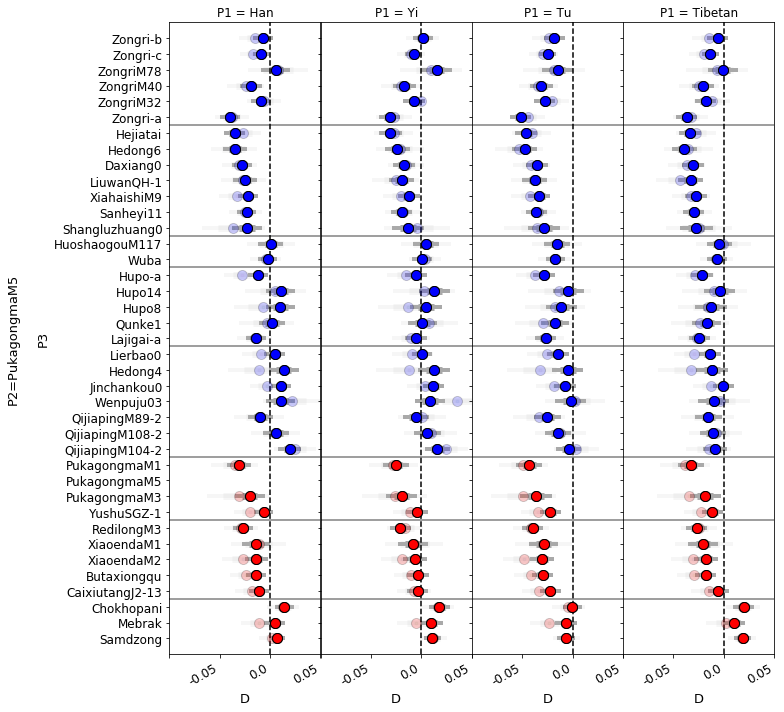

In [12]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","HuoshaogouM117","Wuba","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Jinchankou0","Wenpuju03",#"Lajigai2",
     "QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

mycombo=anx+agq
wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.1]*len(mycombo)
myxmax=[0.05]*len(mycombo)

mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(11,10))

mynames=mycombo
myind="PukagongmaM5"
varypops=["Han","Yi","Tu","Tibetan"] 
#varypops=["Han","Dai","Ami","Daur"] 
#varypops=["Naxi","Yi","Tu","Tibetan"]
#varypops=["Tibetan_NyingchiX","Tibetan_ChamdoX","Tibetan_ShannanX","Sherpa_ShigatseX"]
ypops=mycombo
mytuples=[(1,3),(0,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[[varypop],myind,ypops,out]

    Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
    Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
    Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)" % ('EA',mypops2[1],mypops2[2],mypops2[3])
    mylabel="P1 = %s" % mypops2[0][0]
    #print Daryall
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        if i in anx: wantedcolors="red"
        else: wantedcolors="blue"
        ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[0][ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("P2=%s\n\nP3" % mypops2[1],rotation=90,fontsize=13)
        ax1.set_yticklabels(mynames,fontsize=12)
    else: 
         
        ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    xlabel = ax1.get_xticks().tolist()
    print 'xlabel',xlabel
    ax1.set_xticklabels([""]+xlabel[1:],fontsize=12)

    ax1.set_title(mylabel,fontsize=12)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    for myline in [2.5,7.5,11.5,18.5,23.5,25.5,32.5]:
        ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.subplots_adjust(wspace=0.001) 
plt.show()

In [12]:
plt.subplots_adjust??

xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]
xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]
xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]
xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]


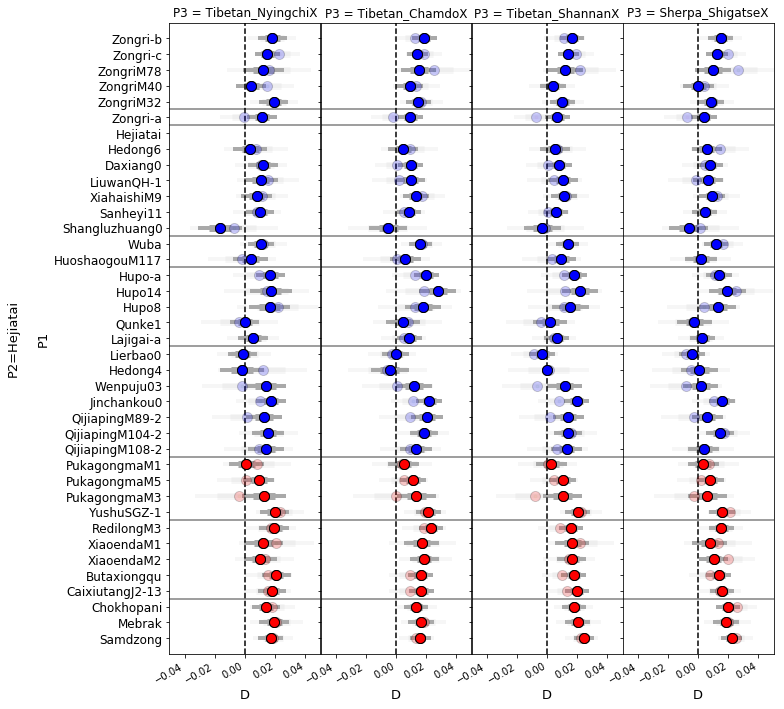

In [8]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

mycombo=anx+agq
wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.05]*len(mycombo)
myxmax=[0.05]*len(mycombo)

mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(11,10))

mynames=mycombo
myind="Hejiatai"
varypops=["Han","Dai","Ami","Daur"] 
varypops=["Naxi","Yi","Tu","Tibetan"]
varypops=["Tibetan_NyingchiX","Tibetan_ChamdoX","Tibetan_ShannanX","Sherpa_ShigatseX"]
ypops=mycombo
mytuples=[(1,3),(0,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[ypops,myind,[varypop],out]

    Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
    Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
    Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)" % (mypops2[2],mypops2[1],'EA',mypops2[3])
    mylabel="P3 = %s" % mypops2[2][0]
    #print Daryall
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        if i in anx: wantedcolors="red"
        else: wantedcolors="blue"
        ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[0][ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("P2=%s\n\nP1" % mypops2[1],rotation=90,fontsize=13)
        ax1.set_yticklabels(mynames,fontsize=12)
    else: 
         
        ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    xlabel = ax1.get_xticks().tolist()
    print 'xlabel',xlabel
    #ax1.set_xticklabels(xlabel,fontsize=12) #[""]+xlabel[1:]

    ax1.set_title(mylabel,fontsize=12)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    for myline in [2.5,7.5,11.5,18.5,23.5,25.5,32.5,33.5]:
        ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.subplots_adjust(wspace=0.001) 
plt.show()

In [2]:
import xlsxwriter as xls


pD="/mnt/solexa/mel_yang/aPlateau/update051518/qpAdm/"
myfilename="all3.2.qpAdm.out"

anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM32","ZongriM40","Zongri-a",
     "Hejiatai","Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Shangluzhuang0",
     "Hupo-a","Lajigai-a","HuoshaogouM117","Wuba","Hupo14","Hupo8","Qunke1",
     "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2","Lierbao0","Hedong4",]
eas=["Han","Daur","Ami","Dai","Tu","Naxi","Yi","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
selEAS=["Han","Daur","Ami","Dai","Naxi","Yi","Tibetan","Sherpa","Tu"]


#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQaNX_S2_aGQaNX_Target_aGQaNX.xlsx",agq+anx,agq+anx,agq+anx)
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQaNX_S2_EA_Target_aGQaNX.xlsx",agq+anx,eas+tib,agq+anx)
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQaNX_S2_EA_Target_EA.xlsx",agq+anx,eas+tib,eas+tib)
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQaNX_S2_aGQaNX_Target_EA.xlsx",agq+anx,agq+anx,eas+tib)
mysets=[(s1,s2,target) for s1 in s1s for s2 in s2s for target in targets]


newfile=xls.Workbook(newfh)
worksheet=newfile.add_worksheet()
notmixture = newfile.add_format({'center_across':True,'bg_color':'#98FB98','num_format':'0.000'}) ##pnest>0.05
mixture = newfile.add_format({'center_across':True,'bg_color':'#B0E0E6','num_format':'0.000'}) ##pnest<0.05
nans = newfile.add_format({'center_across':True,'num_format':'0.000'})
headfont = newfile.add_format({'center_across':True,'bold':True,'num_format':'0.000'})
outs,row=[],0
myfile=open(pD+myfilename,'r')
for line in myfile: 
    if line[0]=="#": outs.append(line.split()[0].split(",")); continue
    x=line.split()
    if x[0]=="outgroup":
        header=x
        worksheet.set_column(1,len(header),7)
        for ind,i in enumerate(x): worksheet.write_string(row,ind,i,headfont)
        continue
    out,s1,s2,target,rank1,rank2,pattern1,ptail1,pattern2,ptail2,pnest,f1,f2,se=tuple(x)
    if (s1,s2,target) not in mysets: continue
    row+=1
    if x[-4]=="NA": 
        for ind,i in enumerate(x): worksheet.write_string(row,ind,i,nans)
        continue
    if float(x[-2])>1 or float(x[-2])<0: 
        x[5:]=["NA" for k in range(5,14)]
        for ind,i in enumerate(x): 
            if ind==4: worksheet.write_number(row,ind,float(i),nans)
            else: worksheet.write_string(row,ind,i,nans)
        continue
    if float(x[-4])<=0.05: myformat=notmixture
    else: myformat=mixture
    for ind,i in enumerate(x): 
        if ind in [4,7,9,10,11,12,13]:
            if i =="-nan": worksheet.write_string(row,ind,i,myformat)
            else: worksheet.write_number(row,ind,float(i),myformat)
        else: worksheet.write_string(row,ind,i,myformat)
newfile.close()        